# Q1 Prepare a prediction model for profit of 50_startups data.
- Do transformations for getting better predictions of profit and
- make a table containing R^2 value for each prepared model.

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years
- File: 50_Startups


In [1]:
# Import Libraries #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
startup = pd.read_csv("D:\\Data Science Assignments\\Multi Linear Regression\\50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


EDA

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.shape

(50, 5)

In [5]:
startup1 = startup.rename(columns={'R&D Spend':'RD', 'Administration':'AD', 'Marketing Spend':'MS', 'State':'ST', 'Profit':'PR'})
startup1

,RD,AD,MS,ST,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startup1[startup1.duplicated()]

,RD,AD,MS,ST,PR


In [7]:
startup1.describe()

,RD,AD,MS,PR
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<function matplotlib.pyplot.show(close=None, block=None)>

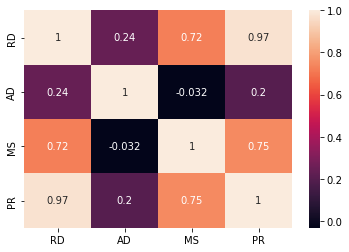

In [8]:
corrMatrix = startup1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show

In [9]:
startup1['RD'].unique()

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])

In [10]:
startup1['AD'].unique()

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [11]:
startup1['MS'].unique()

array([471784.1 , 443898.53, 407934.54, 383199.62, 366168.42, 362861.36,
       127716.82, 323876.68, 311613.29, 304981.62, 229160.95, 249744.55,
       249839.44, 252664.93, 256512.92, 261776.23, 264346.06, 282574.31,
       294919.57,      0.  , 298664.47, 299737.29, 303319.26, 304768.73,
       140574.81, 137962.62, 134050.07, 353183.81, 118148.2 , 107138.38,
        91131.24,  88218.23,  46085.25, 214634.81, 210797.67, 205517.64,
       201126.82, 197029.42, 185265.1 , 174999.3 , 172795.67, 164470.71,
       148001.11,  35534.17,  28334.72,   1903.93, 297114.46,  45173.06])

In [12]:
startup1['ST'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
startup1['PR'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [14]:
startup1['RD'].value_counts()

0.00         2
165349.20    1
28663.76     1
72107.60     1
66051.52     1
65605.48     1
61994.48     1
61136.38     1
63408.86     1
55493.95     1
46426.07     1
46014.02     1
44069.95     1
64664.71     1
20229.59     1
38558.51     1
28754.33     1
27892.92     1
23640.93     1
15505.73     1
22177.74     1
1000.23      1
1315.46      1
75328.87     1
77044.01     1
162597.70    1
67532.53     1
153441.51    1
144372.41    1
142107.34    1
131876.90    1
134615.46    1
130298.13    1
120542.52    1
123334.88    1
101913.08    1
100671.96    1
93863.75     1
91992.39     1
119943.24    1
114523.61    1
78013.11     1
94657.16     1
91749.16     1
86419.70     1
76253.86     1
78389.47     1
73994.56     1
542.05       1
Name: RD, dtype: int64

In [15]:
startup1['AD'].value_counts()

136897.80    1
51283.14     1
127864.55    1
182645.56    1
153032.06    1
115641.28    1
152701.92    1
129219.61    1
103057.49    1
157693.92    1
85047.44     1
127056.21    1
65947.93     1
151377.59    1
82982.09     1
118546.05    1
84710.77     1
96189.63     1
127382.30    1
154806.14    1
124153.04    1
115816.21    1
135426.92    1
51743.15     1
144135.98    1
139553.16    1
99281.34     1
105751.03    1
101145.55    1
118671.85    1
91391.77     1
99814.71     1
147198.87    1
145530.06    1
148718.95    1
108679.17    1
110594.11    1
91790.61     1
127320.38    1
135495.07    1
156547.42    1
122616.84    1
121597.55    1
145077.58    1
114175.79    1
153514.11    1
113867.30    1
153773.43    1
122782.75    1
116983.80    1
Name: AD, dtype: int64

In [16]:
startup1['MS'].value_counts()

0.00         3
471784.10    1
137962.62    1
353183.81    1
118148.20    1
107138.38    1
91131.24     1
88218.23     1
46085.25     1
214634.81    1
210797.67    1
205517.64    1
201126.82    1
197029.42    1
185265.10    1
174999.30    1
172795.67    1
164470.71    1
148001.11    1
35534.17     1
28334.72     1
1903.93      1
297114.46    1
134050.07    1
140574.81    1
443898.53    1
249744.55    1
407934.54    1
383199.62    1
366168.42    1
362861.36    1
127716.82    1
323876.68    1
311613.29    1
304981.62    1
229160.95    1
249839.44    1
304768.73    1
252664.93    1
256512.92    1
261776.23    1
264346.06    1
282574.31    1
294919.57    1
298664.47    1
299737.29    1
303319.26    1
45173.06     1
Name: MS, dtype: int64

In [17]:
startup1['ST'].value_counts()

New York      17
California    17
Florida       16
Name: ST, dtype: int64

In [18]:
startup1['PR'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: PR, dtype: int64

<AxesSubplot:>

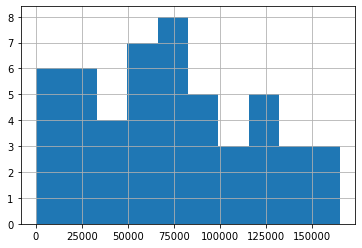

In [19]:
startup1['RD'].hist()

<AxesSubplot:>

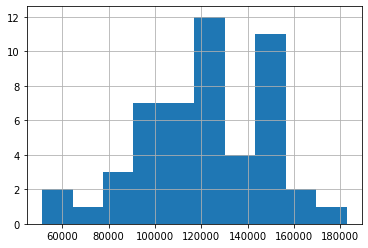

In [20]:
startup1['AD'].hist()

<AxesSubplot:>

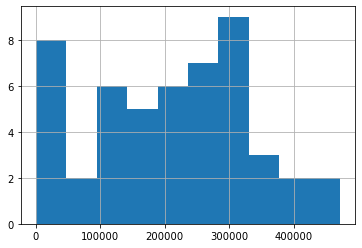

In [21]:
startup1['MS'].hist()

<AxesSubplot:>

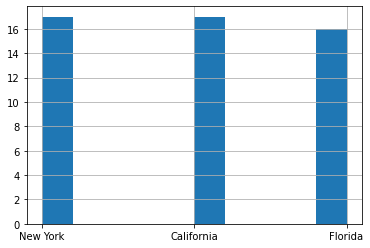

In [22]:
startup1['ST'].hist()

<AxesSubplot:>

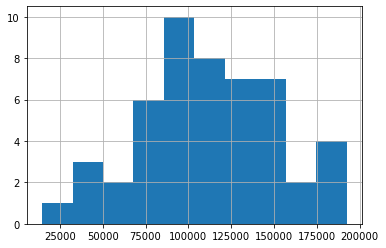

In [23]:
startup1['PR'].hist()

<AxesSubplot:>

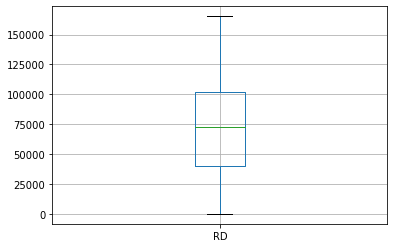

In [24]:
startup1.boxplot(column=['RD'],grid=True)

<AxesSubplot:>

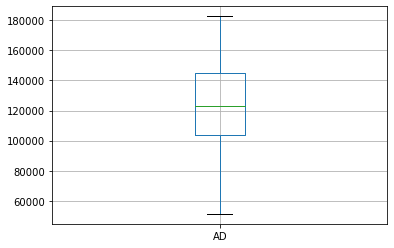

In [25]:
startup1.boxplot(column=['AD'],grid=True)

<AxesSubplot:>

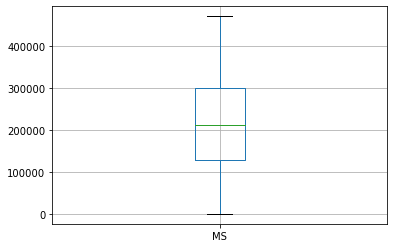

In [26]:
startup1.boxplot(column=['MS'],grid=True)

<AxesSubplot:>

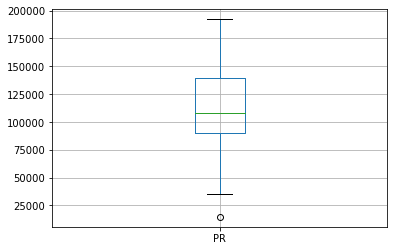

In [27]:
startup1.boxplot(column=['PR'],grid=True)

<AxesSubplot:xlabel='RD', ylabel='Density'>

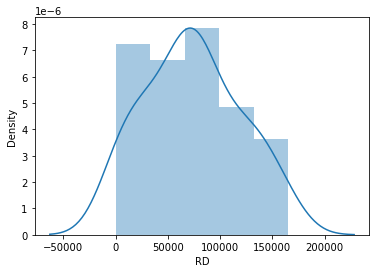

In [28]:
sns.distplot(startup1['RD'])

<AxesSubplot:xlabel='AD', ylabel='Density'>

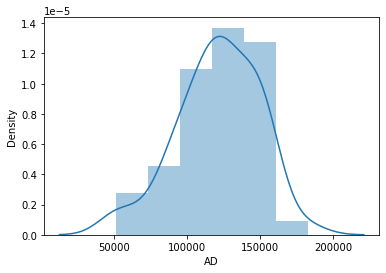

In [29]:
sns.distplot(startup1['AD'])

<AxesSubplot:xlabel='MS', ylabel='Density'>

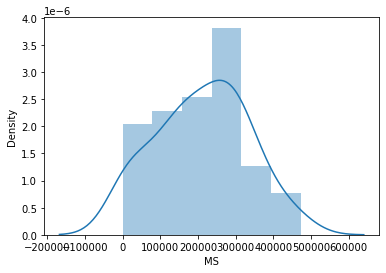

In [30]:
sns.distplot(startup1['MS'])

<AxesSubplot:xlabel='PR', ylabel='Density'>

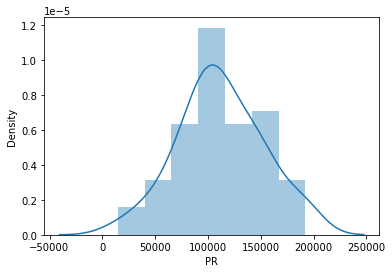

In [31]:
sns.distplot(startup1['PR'])

In [32]:
startup1.corr()

,RD,AD,MS,PR
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
PR,0.972900,0.200717,0.747766,1.000000


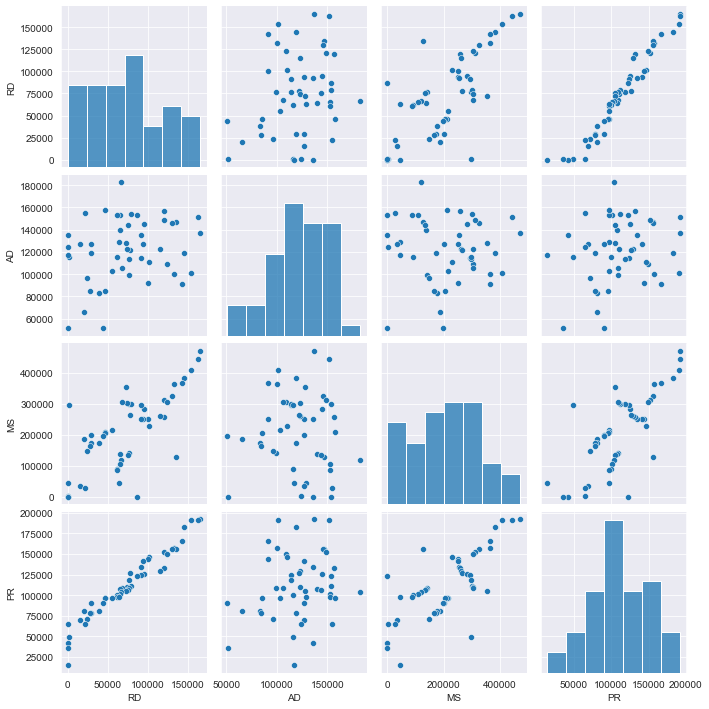

In [33]:
sns.set_style(style='darkgrid')
sns.pairplot(startup1)

In [34]:
startup1.isnull().sum()

RD    0
AD    0
MS    0
ST    0
PR    0
dtype: int64

In [35]:
startup1.describe()

,RD,AD,MS,PR
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [36]:
# Model Building #
model=smf.ols("PR ~ RD+AD+MS",data=startup1).fit()

In [37]:
# Model Testing #
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

<AxesSubplot:xlabel='RD', ylabel='PR'>

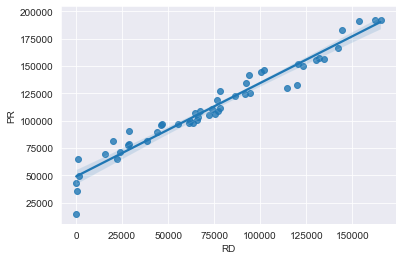

In [38]:
sns.regplot(x=startup1['RD'], y=startup1['PR'])

<AxesSubplot:xlabel='AD', ylabel='PR'>

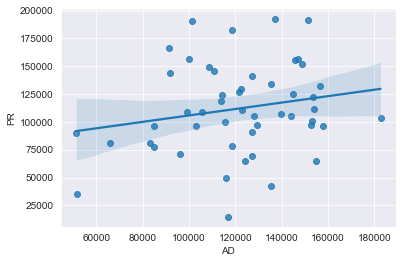

In [39]:
sns.regplot(x=startup1['AD'], y=startup1['PR'])

<AxesSubplot:xlabel='MS', ylabel='PR'>

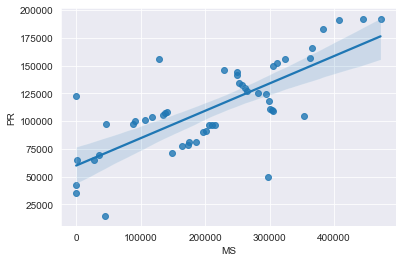

In [40]:
sns.regplot(x=startup1['MS'], y=startup1['PR'])

In [41]:
startup1.head()

,RD,AD,MS,ST,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


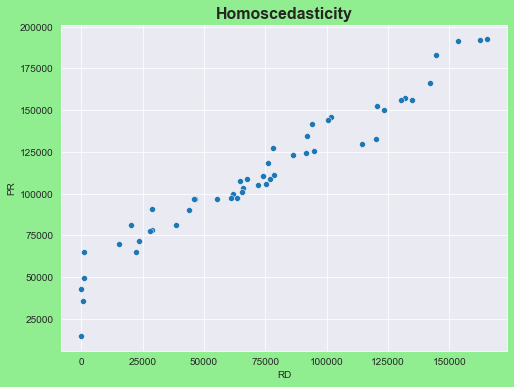

In [42]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = startup1['RD'], y = startup1['PR'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

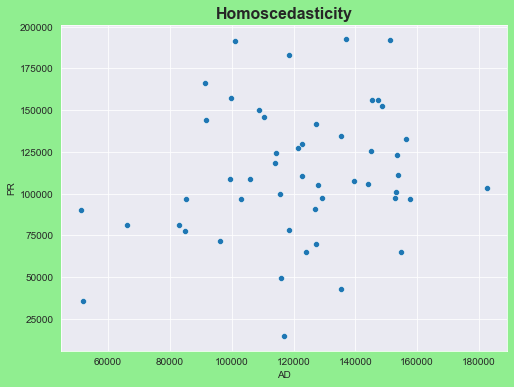

In [43]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = startup1['AD'], y = startup1['PR'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

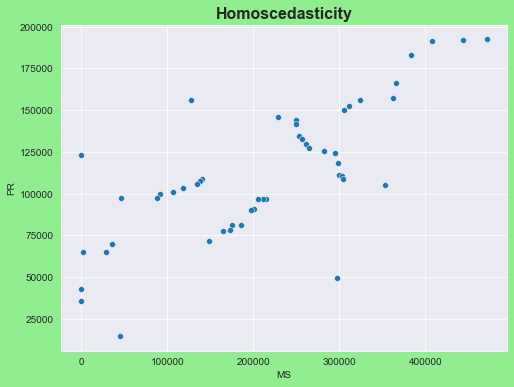

In [44]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = startup1['MS'], y = startup1['PR'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [45]:
startup1.var()

RD    2.107017e+09
AD    7.849973e+08
MS    1.495492e+10
PR    1.624588e+09
dtype: float64

In [46]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 AD           -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 AD           0.60176
 MS           0.10472
 dtype: float64)

In [47]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [48]:
slr_a=smf.ols("PR~AD",data=startup1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [49]:
slr_m=smf.ols("PR ~ MS",data=startup1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [50]:
mlr_am=smf.ols("PR ~ AD+MS",data=startup1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [51]:
mlr_am=smf.ols("PR ~ RD",data=startup1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    19.320288
 RD           29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RD           3.500322e-32
 dtype: float64)

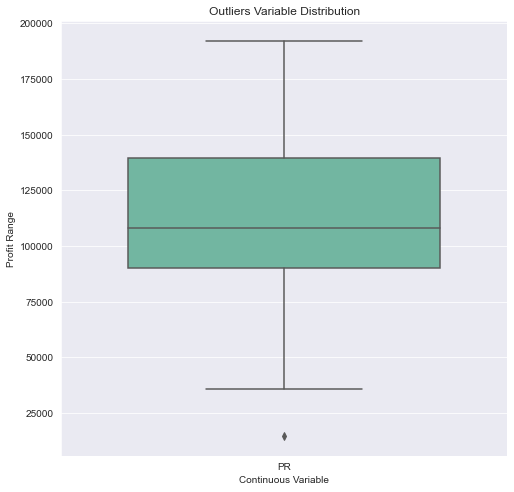

In [52]:
outliers = ['PR']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=startup1[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

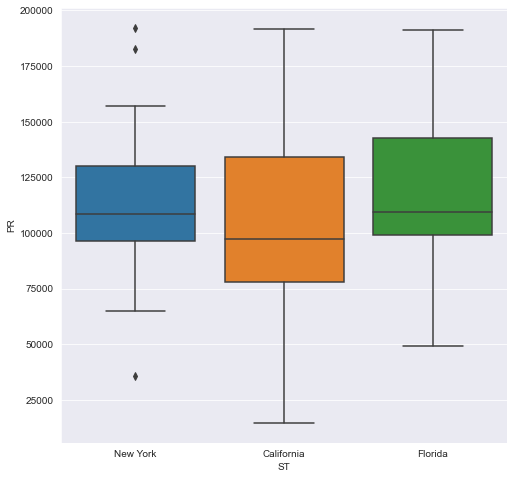

In [53]:
sns.boxplot(x = 'ST', y = 'PR', data = startup1)
plt.show()

# Model Validation

Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [54]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RD ~ AD+MS",data=startup1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD ~ RD+MS",data=startup1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS ~ RD+AD",data=startup1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


- None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation


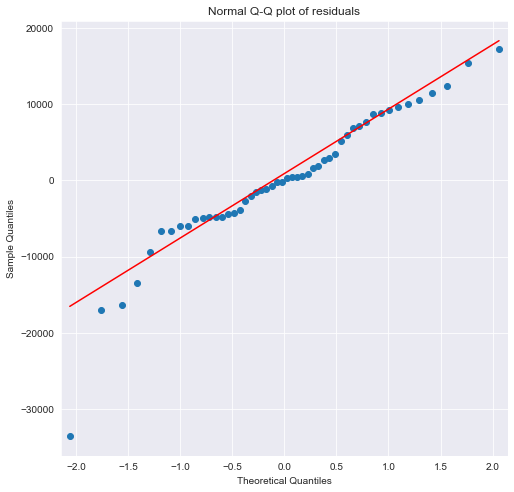

In [55]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [56]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [57]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

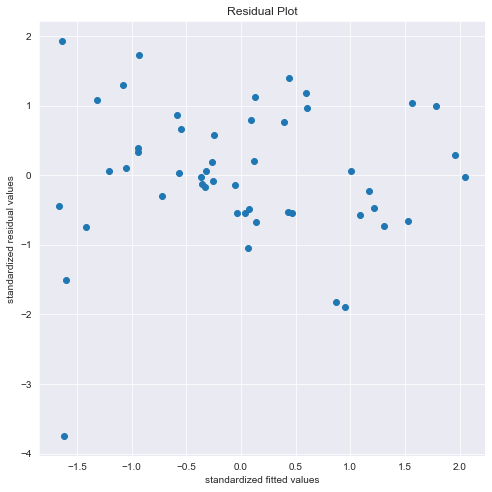

In [58]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [59]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


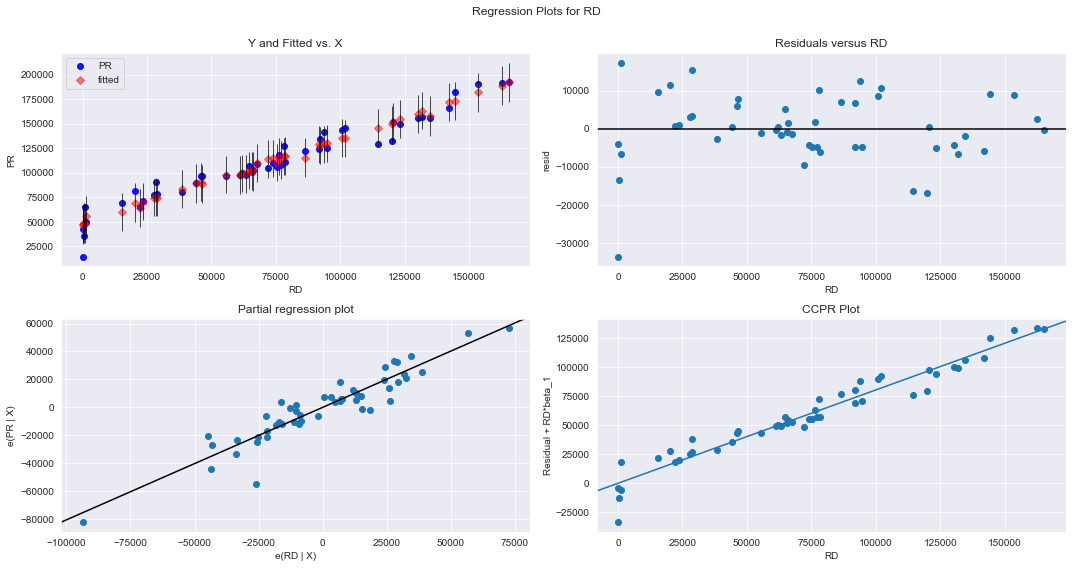

In [60]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


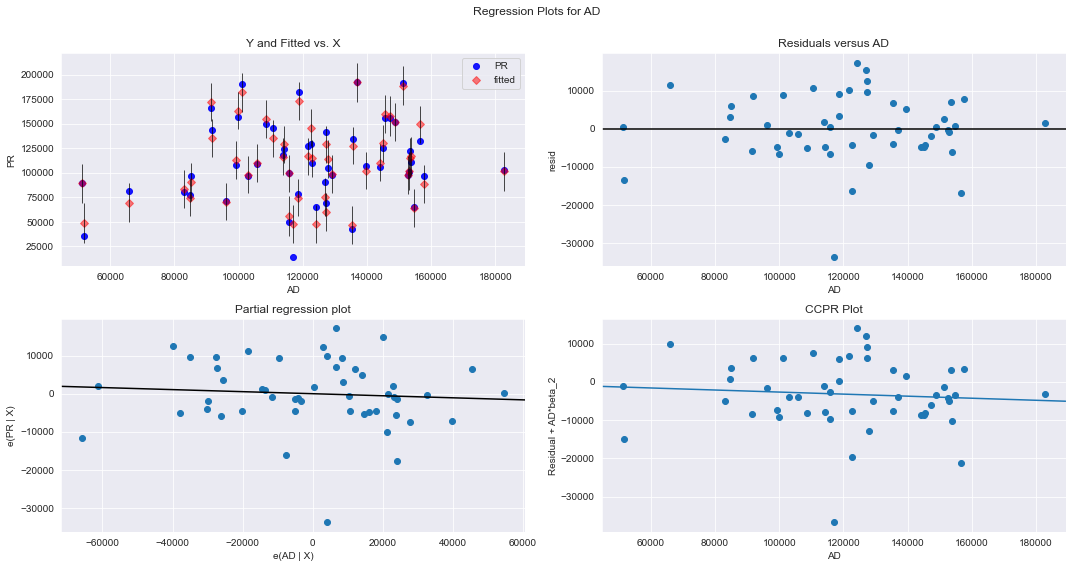

In [61]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

eval_env: 1


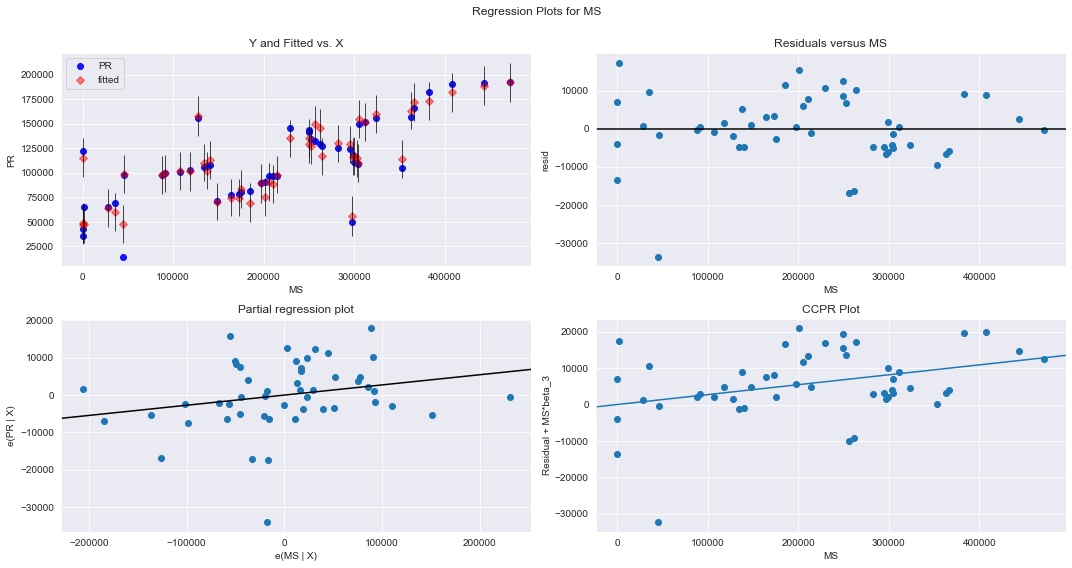

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

- Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [63]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

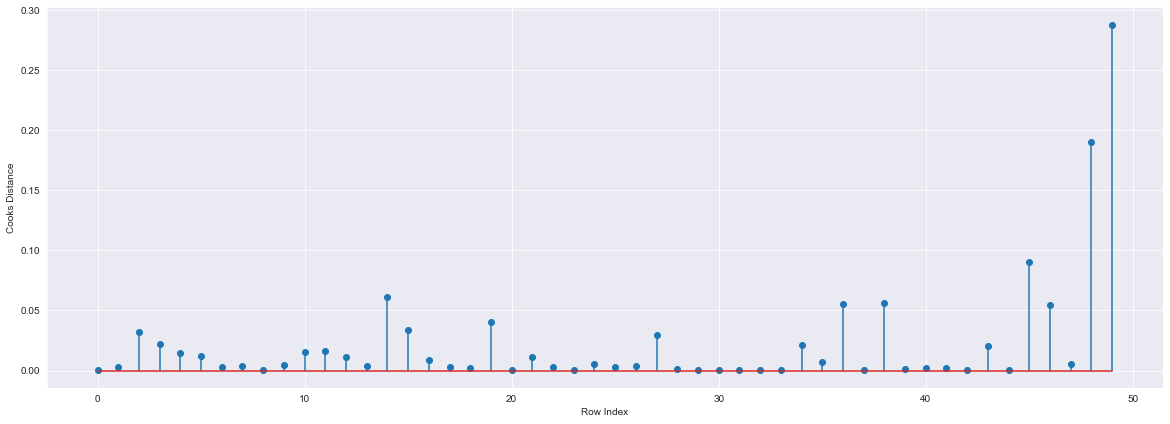

In [64]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543267)

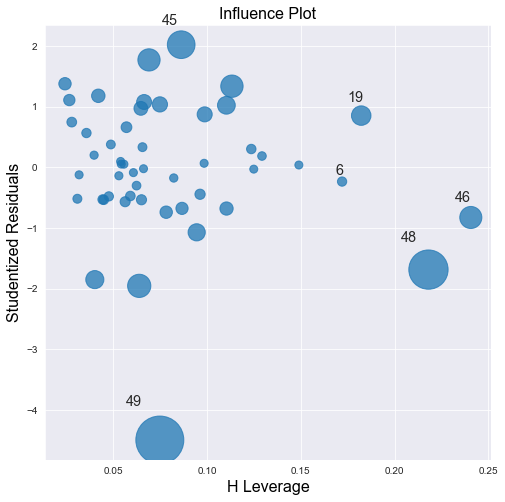

In [66]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [67]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startup1.shape[1]
n=startup1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [68]:
startup1[startup1.index.isin([49])]

,RD,AD,MS,ST,PR
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [69]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
data2

,RD,AD,MS,ST,PR
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [70]:
model2=smf.ols("PR ~ RD+AD+MS",data=data2).fit()

In [71]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("PR ~ RD+AD+MS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("PR ~ RD+AD+MS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918795
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [72]:
final_model.rsquared 

0.9882757054424702

In [73]:
data2

,RD,AD,MS,ST,PR
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


# Model Predictions

In [74]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':70000,"AD":90000,"MS":140000},index=[0])
new_data

,RD,AD,MS
0,70000,90000,140000


In [75]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [76]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# Table containing R^2 value for each prepared model

In [77]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


In [78]:
# spliting Dataset in Dependent & Independent Variables
X = startup1.iloc[:, :-1].values
y = startup1.iloc[:, 4].values

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [81]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [83]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [84]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149948
Model Score/Performance on Training data 0.9515496105627431


In [85]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [86]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716638


In [87]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946436


In [88]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974601


In [89]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580026


# Q2 
- Consider only the below columns and prepare a prediction model for predicting Price.

- Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings("ignore")

In [100]:
toyota = pd.read_csv("D:\Data Science Assignments\Multi Linear Regression\ToyotaCorolla.csv",encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [101]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [103]:
toyo=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyo

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [104]:
toyo1=toyo.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [106]:
toyo1[toyo1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [107]:
toyo2=toyo1.drop_duplicates().reset_index(drop=True)
toyo2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [108]:
toyo2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

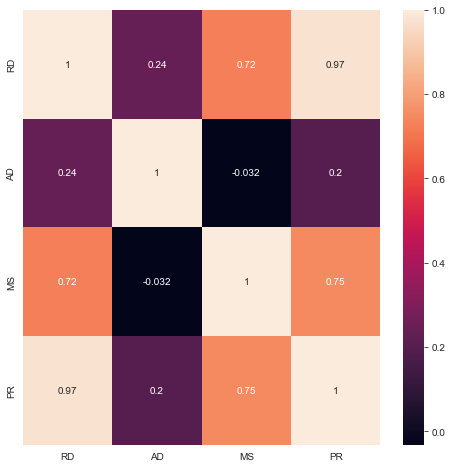

In [154]:
corrMatrix = startup1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show

In [109]:
toyo2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


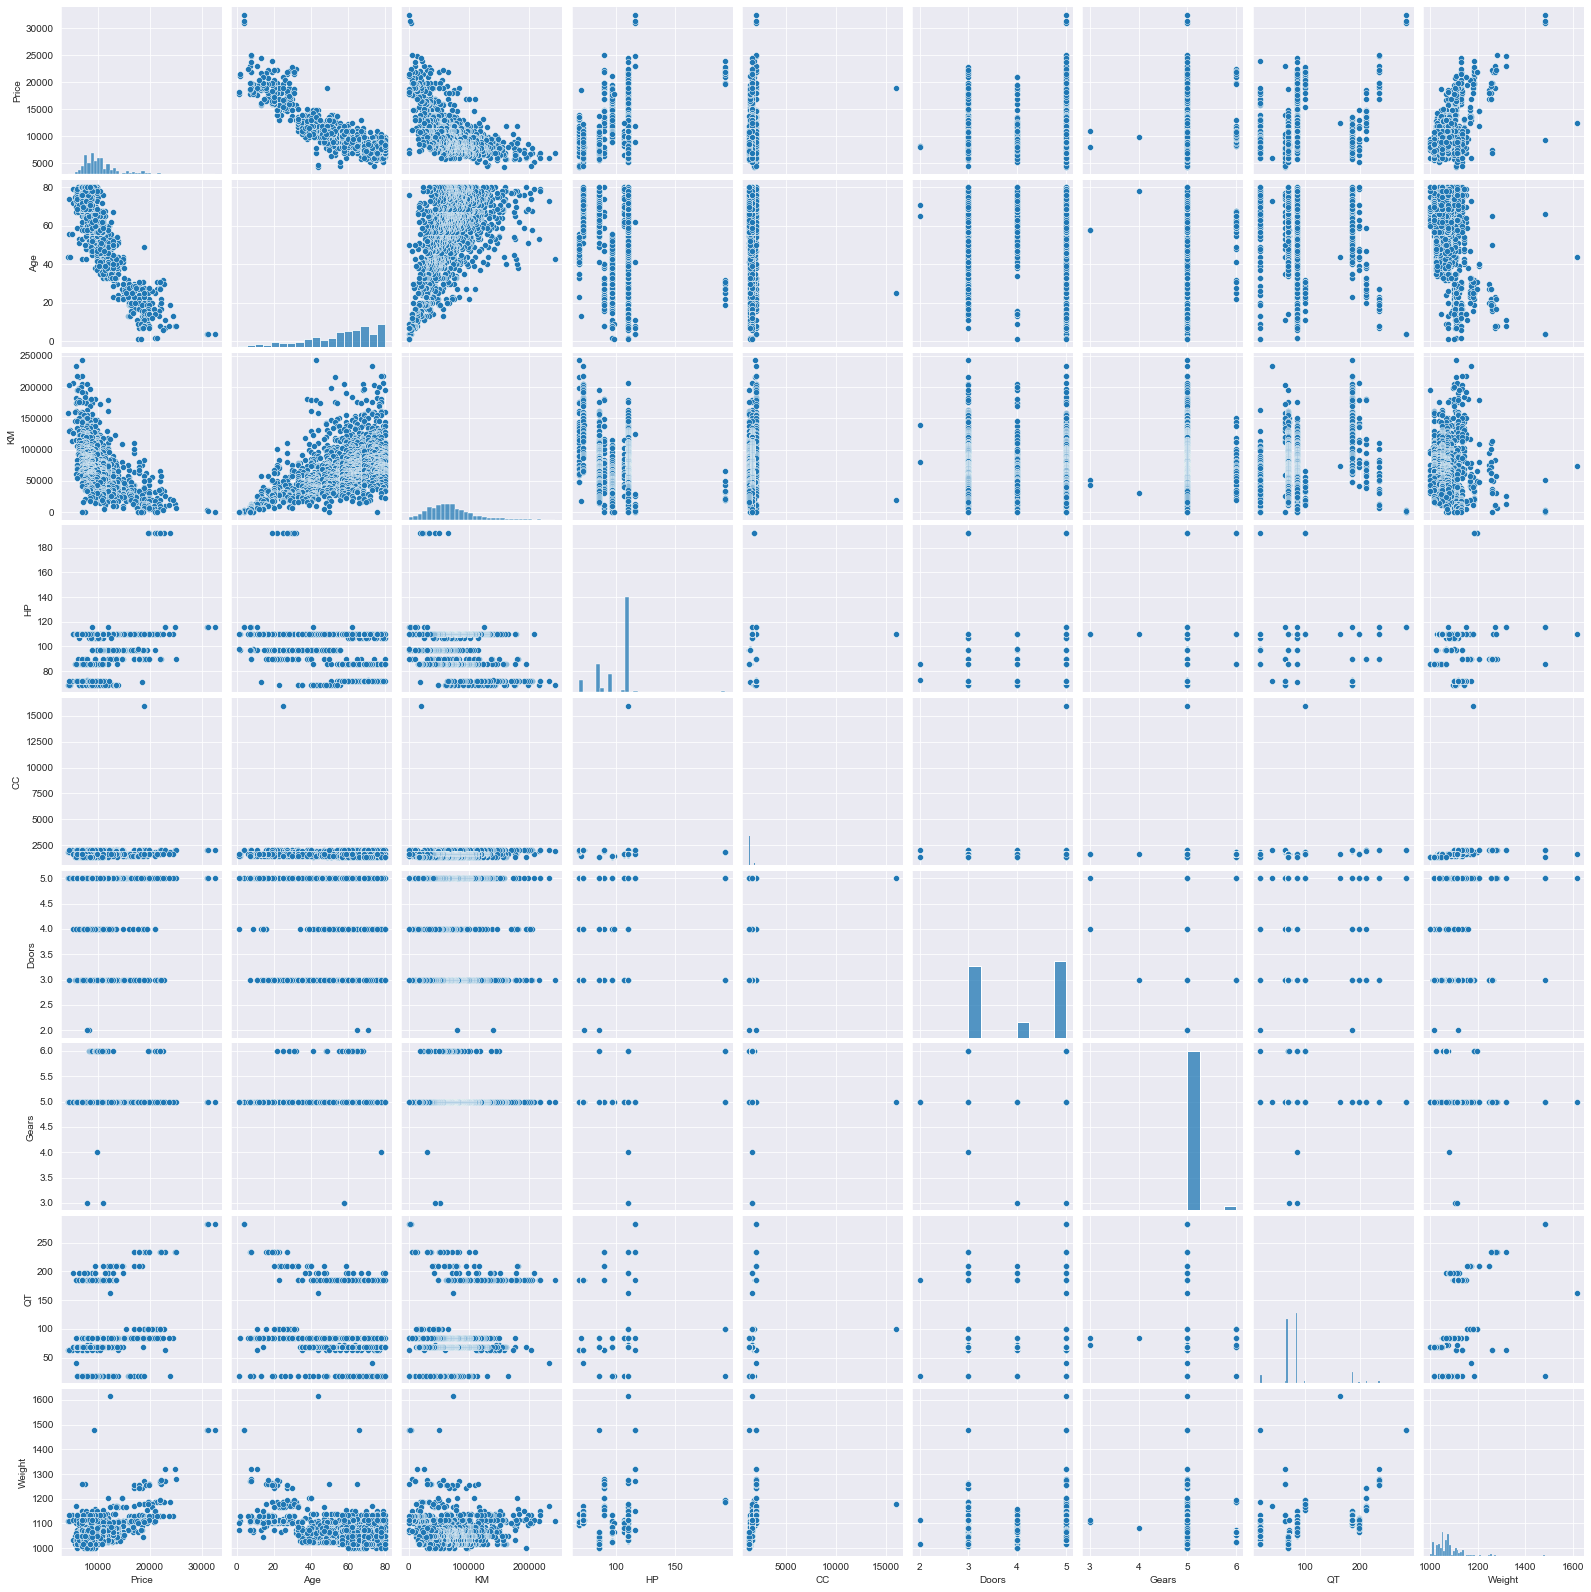

In [110]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo2)

# Model Building

In [111]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit()

# Model testing

In [112]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [118]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [114]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

- Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
- Also find their tvalues and pvalues

In [119]:
slr_c=smf.ols('Price~CC',data=toyo2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [116]:
slr_d=smf.ols('Price~Doors',data=toyo2).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [117]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyo2).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [121]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


- None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

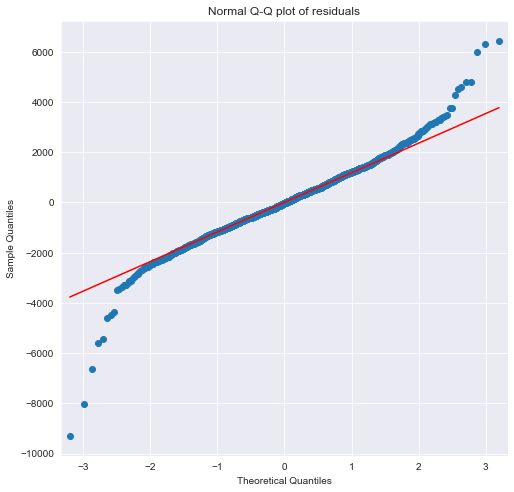

In [122]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [123]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [124]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [125]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

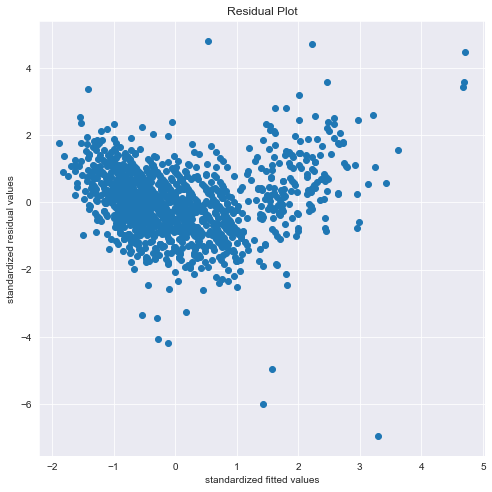

In [126]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

- Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
- using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


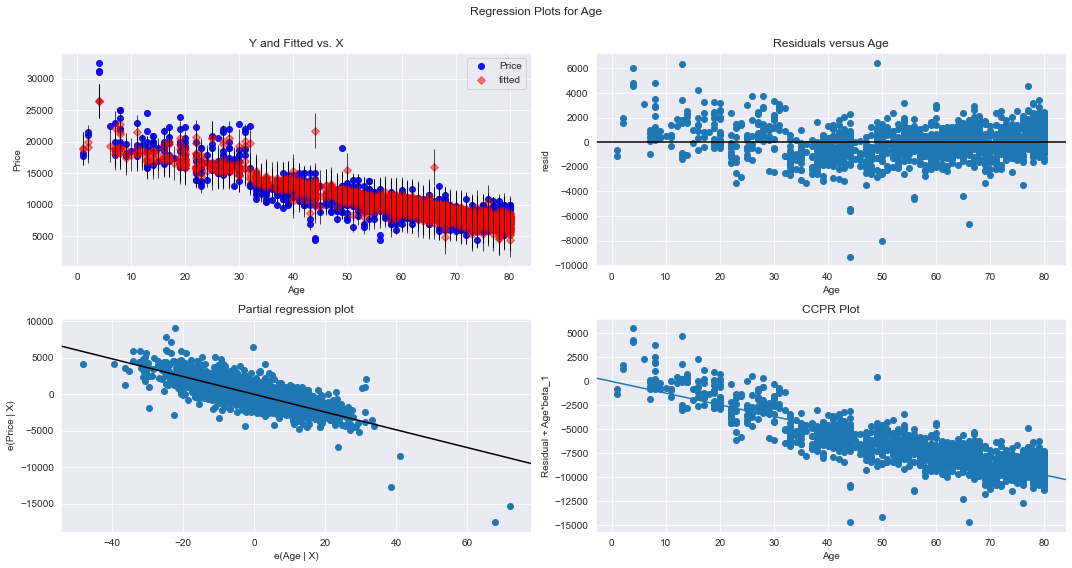

In [127]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


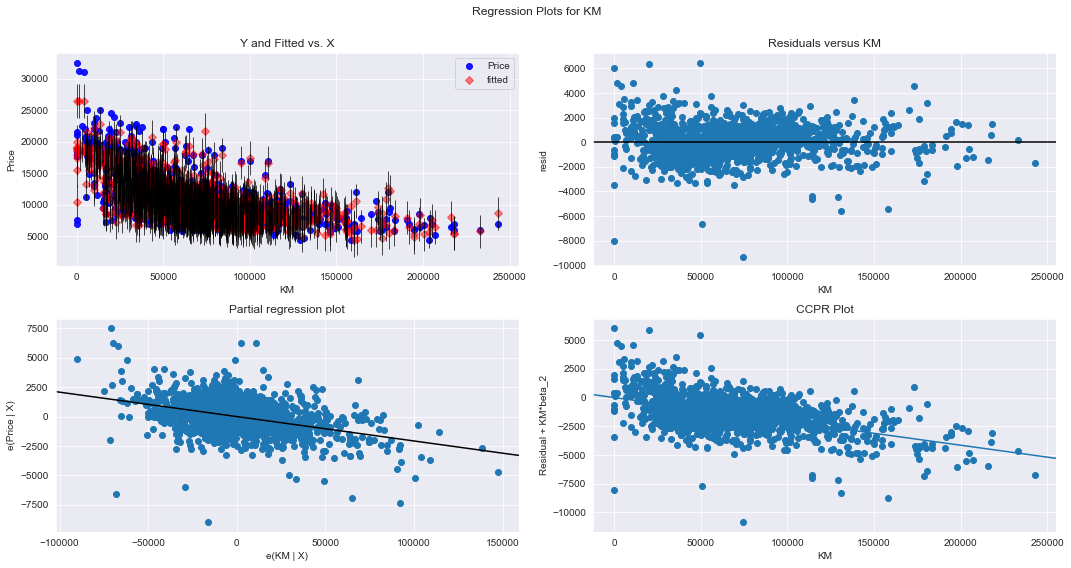

In [128]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


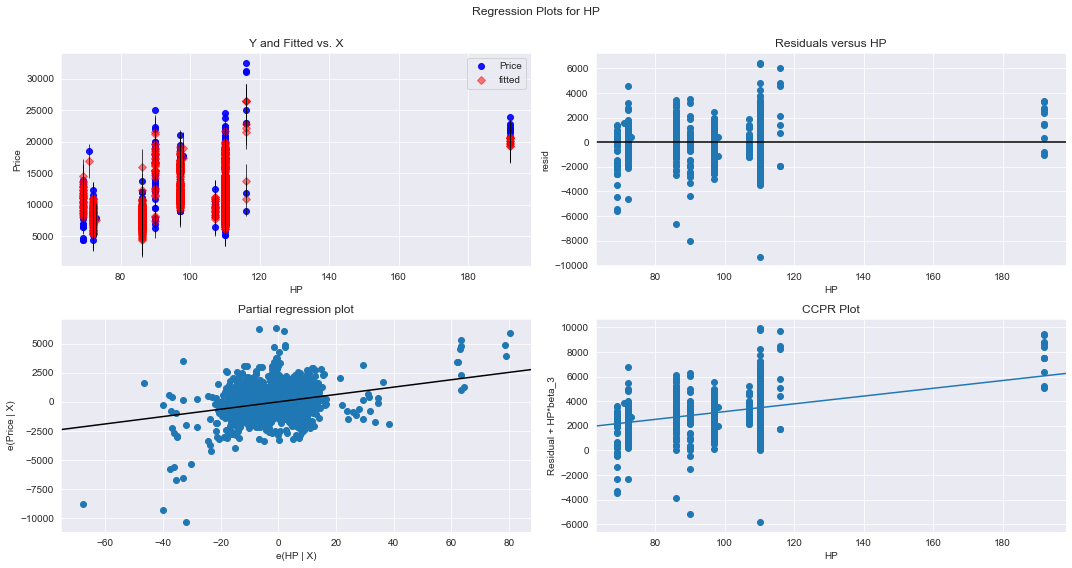

In [129]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


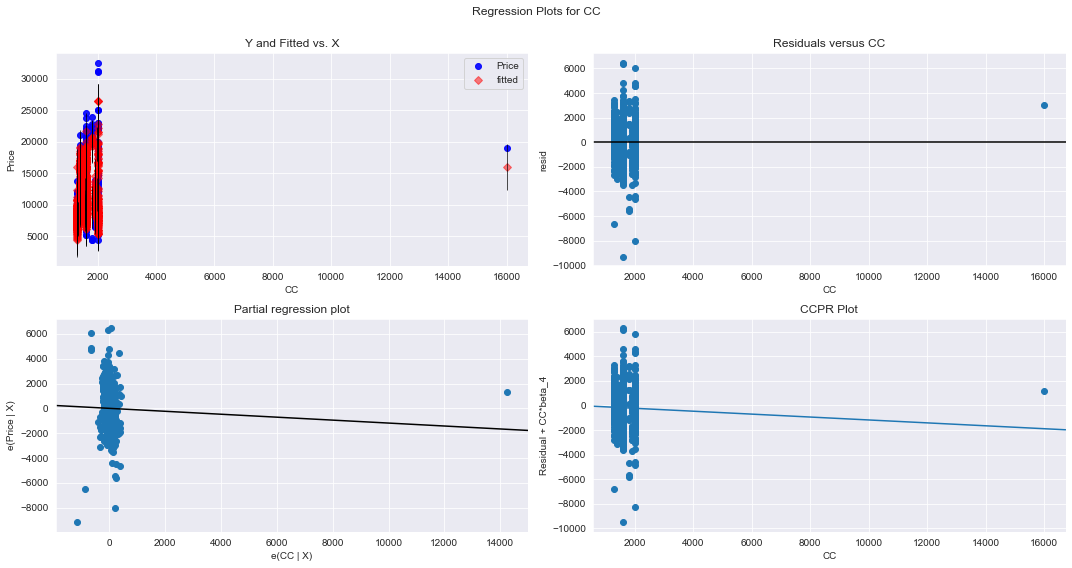

In [130]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


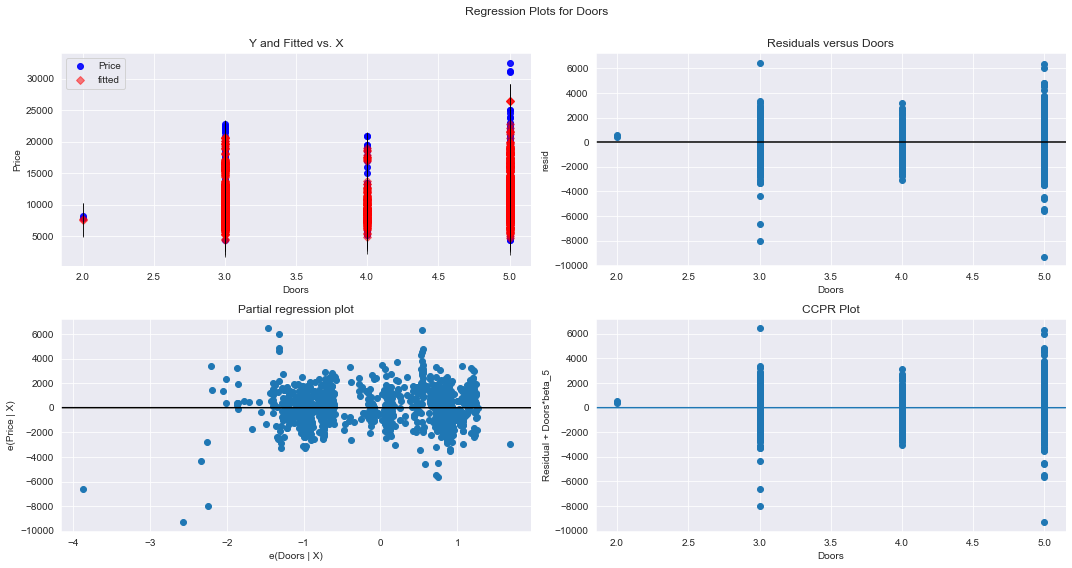

In [131]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


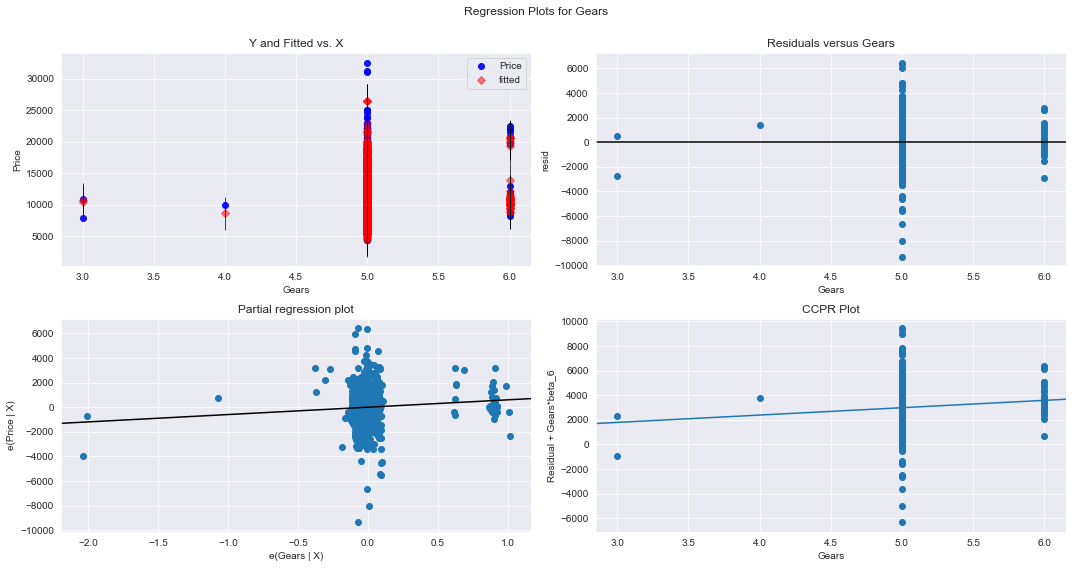

In [132]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


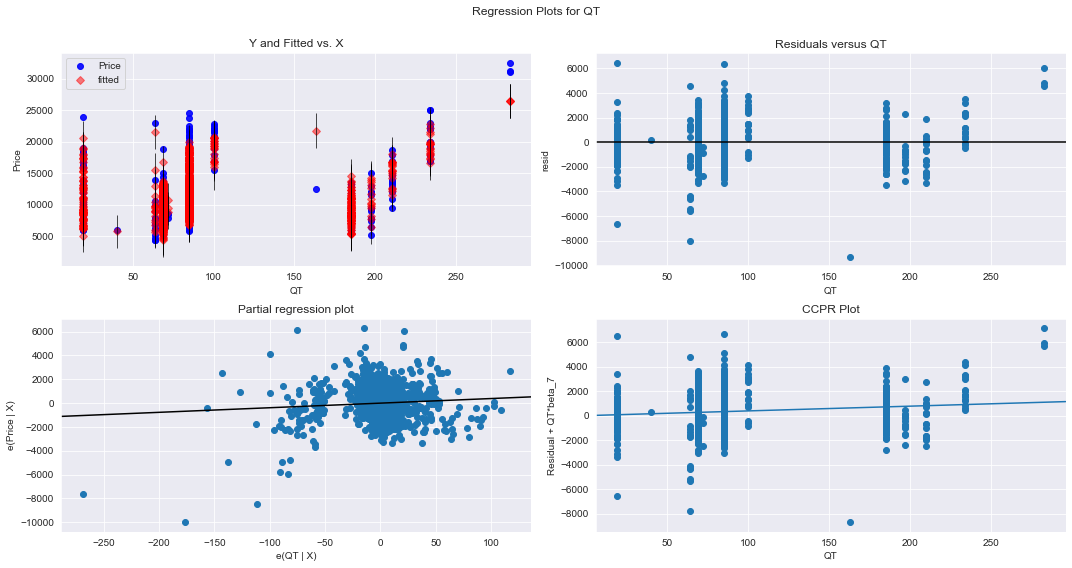

In [133]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


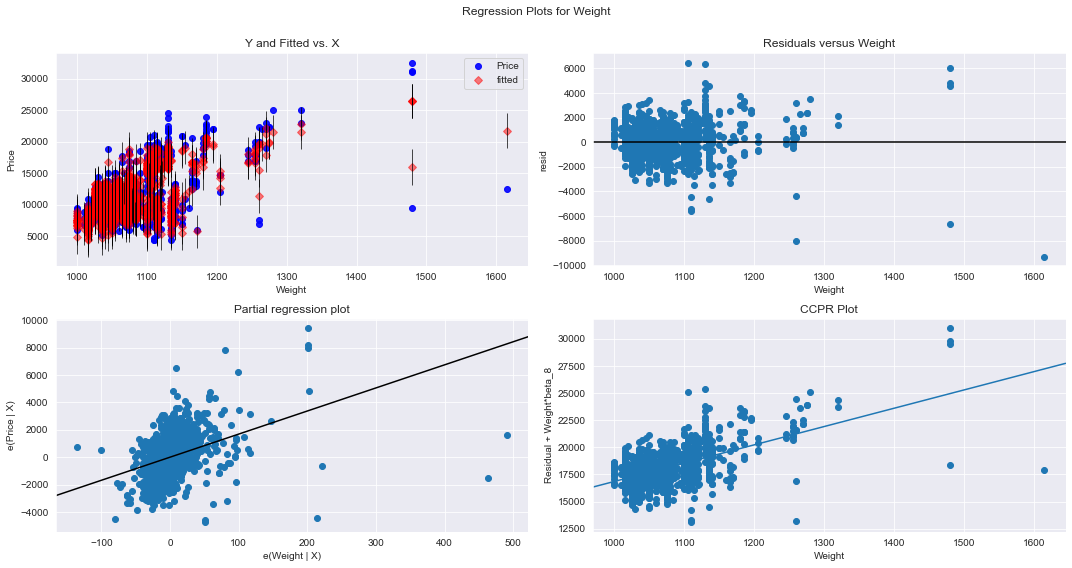

In [134]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

- Two Techniques : 1. Cook's Distance & 2. Leverage value

In [136]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

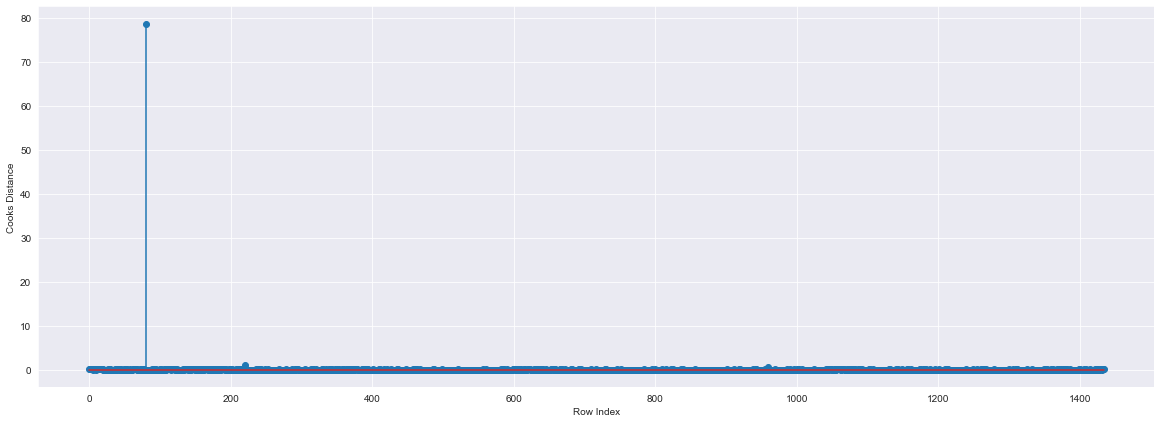

In [137]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [138]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224984)

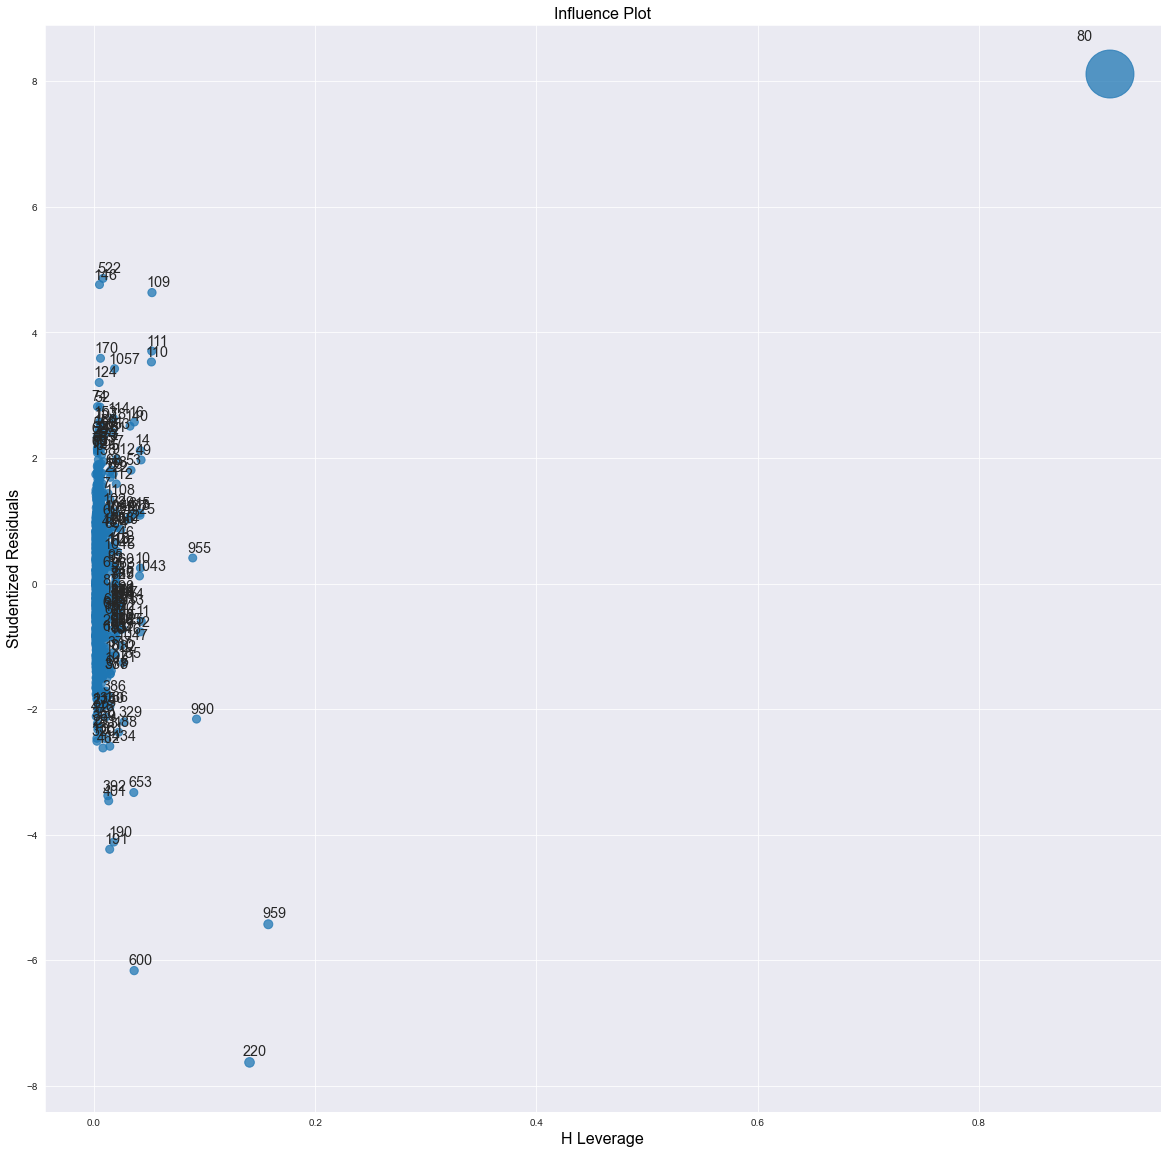

In [139]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [140]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo2.shape[1]
n=toyo2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [141]:
toyo2[toyo2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [142]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo2.copy()
toyo_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [144]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo3=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [145]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo3=toyo3.drop(toyo3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo3
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612916
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057647
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.893954642514717
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is improv

In [146]:
final_model.rsquared # Model Accuracy is increased to 90.02%

0.9003762532318559

In [147]:
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Predictions

In [148]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [149]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [152]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo3)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

# Preparing a table containing  value for R^2 each prepared model

In [155]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.900224
1,Final_Model,0.900376


In [156]:
# spliting Dataset in Dependent & Independent Variables
X = startup1.iloc[:, :-1].values
y = startup1.iloc[:, 4].values

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [159]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [160]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [161]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [162]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149948
Model Score/Performance on Training data 0.9515496105627431


In [163]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [164]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716638


In [165]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946436


In [166]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974601


In [167]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580026
